In [1]:
import copy
import itertools
import pandas as pd
import numpy as np

import bpmn_python.bpmn_diagram_layouter as layouter
import bpmn_python.bpmn_diagram_visualizer as visualizer
import bpmn_python.bpmn_diagram_rep as diagram

In [95]:
#log_file_path = "./sample_logs/heuristic_log.xes"
log_file_path = "./sample_logs/log_heuristic_2_loops.xes"
#log_file_path = "./sample_logs/log_self_loop.xes"
#log_file_path = "./sample_logs/my-example_short.xes"

In [86]:
threshold = 0.4

In [96]:
%run heuristic_miner_wprowadzenie.ipynb


,a,b,c,d,e,f,g
a,NaN,0.833333,NaN,NaN,NaN,NaN,NaN
b,-0.833333,NaN,0.0,0.833333,NaN,NaN,NaN
c,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
d,NaN,-0.833333,NaN,NaN,0.833333,NaN,NaN
e,NaN,NaN,NaN,-0.833333,NaN,0.0,0.833333
f,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
g,NaN,NaN,NaN,NaN,-0.833333,NaN,NaN


,a,b,c,d,e,f,g
a_a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_b,NaN,NaN,0.923077,NaN,NaN,NaN,NaN
c_c,NaN,0.923077,NaN,NaN,NaN,NaN,NaN
d_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_e,NaN,NaN,NaN,NaN,NaN,0.933333,NaN
f_f,NaN,NaN,NaN,NaN,0.933333,NaN,NaN
g_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def negativeInRow(array, start):
    for i, x in enumerate(array):
        if x <0 and i != start:
            return i
def positiveInRow(array, start):
    for i, x in enumerate(array):
        if x > 0 and i != start:
            return i

In [21]:
def nextNoNanIndex(array, start):
    nextItems = array[start+1:]
    for i, x in enumerate(nextItems):
        if not np.isnan(x):
            #print(y)
            return 1 + start + i

In [98]:
Xl_a = []
Xl_b = []
Xl_c = []
P_d = []
P_e = []
L_1 = []
L_2 = []

for task in range(len(T_0)):
    
    x = task    
    
    #that's L_1
    if relations[x,x] > threshold: 
        aa = negativeInRow(relations[x],x) #a->bb (minus w rzędzie b)
        cc = positiveInRow(relations[x],x)#bb->c (plus w b)
        if not aa+1:
            print('todo_a')##L_1.append(())
        elif not cc+1:
            print('todo_c')##L_1.append(())
        else:
            L_1.append((T_0[aa],T_0[x],T_0[cc])) 
        
    #y = 1
    y = nextNoNanIndex(relations[x],0)
    if not y :
        continue 
    #print(y)
    
    
    for i in range(len(T_0)-x):
        a = x+i
        #print(x,a)  
        
        #that's L_2
        if loops[x,a] > 0: 
            #print('got it')
            aba = negativeInRow(relations[x],x) #a->bcb (minus w rzędzie b)
            cbc = positiveInRow(relations[x],x)#bcb->d (plus w b)
            L_2.append(( T_0[aba],(T_0[x],T_0[a],T_0[x]), T_0[cbc]))

        #that's A   
        if relations[x,a] > threshold and relations[a,x] < -threshold: 
            Xl_a.append((T_0[x],T_0[a])) #A is ok
        
        
    for i in range(len(T_0)-y):
        a = y+i
        z = nextNoNanIndex(relations[x],a)
        #print(x,a,z)
        if not (a and z):
            continue  
        
        #that's B,C
        if np.all(relations[x,a] > threshold and relations[x,z] > threshold and np.isnan(relations[a,z])):
            Xl_b.append((T_0[x],(T_0[a],T_0[z]))) 
        if np.all(relations[x,a] < -threshold and relations[x,z] < -threshold and np.isnan(relations[a,z])):
            Xl_c.append(((T_0[a],T_0[z]),T_0[x])) #C is ok
        
        #that's D,E
        if np.all(relations[x,a]> -threshold and relations[x,z] > -threshold and relations[a,z] < threshold):
            P_d.append((T_0[x],(T_0[a], T_0[z]))) #k
        if np.all(relations[x,a] < threshold and relations[x,z] < threshold and relations[a,z] < threshold):
            P_e.append(((T_0[a], T_0[z]),T_0[x])) 

In [99]:
Yl = copy.deepcopy(Xl_a)
print(Yl)

for bit in Xl_b:    
    if ((bit[0], bit[1][0])) in Yl:
        Yl.remove((bit[0], bit[1][0]))
    if ((bit[0], bit[1][1])) in Yl:
        Yl.remove((bit[0], bit[1][1]))
    #Yl.append(bit)

for bit in Xl_c:    
    if ((bit[0][0], bit[1])) in Yl:
        Yl.remove((bit[0][0], bit[1]))
    if ((bit[0][1], bit[1])) in Yl:
        Yl.remove((bit[0][1], bit[1]))
    #Yl.append(bit)

for bit in P_d:    
    if ((bit[0], bit[1][0])) in Yl:
        Yl.remove((bit[0], bit[1][0]))
    if ((bit[0], bit[1][1])) in Yl:
        Yl.remove((bit[0], bit[1][1]))
        #Yl.append(bit)

for bit in P_e:    
    if ((bit[0][0], bit[1])) in Yl:
        Yl.remove((bit[0][0], bit[1]))
    if ((bit[0][1], bit[1])) in Yl:
        Yl.remove((bit[0][1], bit[1]))
    #Yl.append(bit)
    
    
#TODO: if bit in L1/L2 remove from b/c/d/e ?
for bit in L_1:
    if ((bit[0], bit[1])) in Yl:
        Yl.remove((bit[0], bit[1]))
    if ((bit[1], bit[2])) in Yl:
        Yl.remove((bit[1], bit[2]))
    #Yl.append(bit)


for bit in L_2:
    if ((bit[0], bit[1][0])) in Yl:
        Yl.remove((bit[0], bit[1][0]))
    if ((bit[0], bit[1][1])) in Yl:
        Yl.remove((bit[0], bit[1][1]))
    if ((bit[1][0], bit[2])) in Yl:
        Yl.remove((bit[1][0], bit[2]))

    #Yl.append(bit)
    
print(Yl)
print(Xl_b)
print(Xl_c)
print(P_d)
print(P_e) 
print(L_1)
print(L_2)

[('a', 'b'), ('b', 'd'), ('d', 'e'), ('e', 'g')]
[]
[]
[]
[]
[]
[]
[('a', ('b', 'c', 'b'), 'd'), ('d', ('e', 'f', 'e'), 'g')]


In [100]:
bpmn_graph = diagram.BpmnDiagramGraph()
bpmn_graph.create_new_diagram_graph(diagram_name="diagram1")
process_id = bpmn_graph.add_process_to_diagram()
output_png_file = "diagram"
output_file_with_di = "output.xml"
output_directory = "./"

In [101]:
[start_id,_] = bpmn_graph.add_start_event_to_diagram(process_id, start_event_name="start_event", )

xors_fork = []
for n in Xl_b:
    xors_fork.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_fork"))[0])
xors_fork_l1 = []
for n in L_1:
    xors_fork_l1.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_fork"))[0])
xors_fork_l2 = []
for n in L_2:
    xors_fork_l2.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_fork"))[0])

ands_fork = []
for t in P_d:
    ands_fork.append((bpmn_graph.add_parallel_gateway_to_diagram(process_id, gateway_name="and_fork"))[0])

all_tasks = []
for task in tasks: 
    all_tasks.append((bpmn_graph.add_task_to_diagram(process_id, task_name=str(task)))[0])
    #print(all_tasks)

xors_join = []
for i in Xl_c:
    xors_join.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_join"))[0])
xors_join_l1 = []
for n in L_1:
    xors_join_l1.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_join"))[0])
xors_join_l2 = []
for n in L_2:
    xors_join_l2.append((bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_join"))[0])

ands_join = []                     
for k in P_e:
    ands_join.append((bpmn_graph.add_parallel_gateway_to_diagram(process_id, gateway_name="and_join"))[0])

[end_id, _] = bpmn_graph.add_end_event_to_diagram(process_id, end_event_name="end_event", )



In [102]:
if len(T_1)>1:
    [first_xor,_] = bpmn_graph.add_exclusive_gateway_to_diagram(process_id, gateway_name="xor_fork")
    #start_id -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=start_id, target_ref_id=first_xor)
    for elem in T_1:
        bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=first_xor, target_ref_id=all_tasks[T_0.index(elem)] )
        #XOR -> bit
else:
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=start_id, target_ref_id=all_tasks[T_0.index(T_1[0])]) #start_event -> T_1[0]

for bits in T_n:
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(bits)], target_ref_id=end_id )#bit -> end_event
    

for num, B in enumerate(Xl_b):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(B[0])], target_ref_id=xors_fork[num] )#B[0] -> XOR 
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork[num], target_ref_id=all_tasks[T_0.index(B[1][0])] )#XOR -> B[1][0]
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork[num], target_ref_id=all_tasks[T_0.index(B[1][1])] )#XOR -> B[1][1]
    
for num, C in enumerate(Xl_c):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(C[0][0])], target_ref_id=xors_join[num] )#C[0][0] -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(C[0][1])], target_ref_id=xors_join[num] )#C[0][1] -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_join[num], target_ref_id=all_tasks[T_0.index(C[1])] )#XOR -> C[1]
    
for num, D in enumerate(P_d):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(D[0])], target_ref_id=ands_fork[num] )#D[0] -> AND 
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=ands_fork[num], target_ref_id=all_tasks[T_0.index(D[1][0])] )#AND -> D[1][0]
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=ands_fork[num], target_ref_id=all_tasks[T_0.index(D[1][1])] )#AND -> D[1][1]
    
for num, E in enumerate(P_e):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(E[0][0])], target_ref_id=ands_join[num] )#E[0][0] -> AND
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(E[0][1])], target_ref_id=ands_join[num] )#E[0][1] -> AND
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=ands_join[num], target_ref_id=all_tasks[T_0.index(E[1])] )#AND -> E[1]        

    
for A in Yl:      
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(A[0])], target_ref_id=all_tasks[T_0.index(A[1])] )#A[0] -> A[1]
    
    
for num, L in enumerate(L_1):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(L[0])], target_ref_id=xors_join_l1[num] )#A -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(L[1])], target_ref_id=xors_fork_l1[num] )#L -> XOR 
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_join_l1[num], target_ref_id=all_tasks[T_0.index(L[1])] )#XOR -> L
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork_l1[num], target_ref_id=xors_join_l1[num] )#XOR -> XOR 
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork_l1[num], target_ref_id=all_tasks[T_0.index(L[2])] )#XOR -> C

for num, L in enumerate(L_2):
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(L[0])], target_ref_id=xors_join_l2[num] )#A -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(L[1][0])], target_ref_id=xors_fork_l2[num] )#B -> XOR 
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_join_l2[num], target_ref_id=all_tasks[T_0.index(L[1][0])] )#XOR -> B
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork_l2[num], target_ref_id=all_tasks[T_0.index(L[1][1])] )#XOR -> C    
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=all_tasks[T_0.index(L[1][1])], target_ref_id=xors_join_l2[num] )#C -> XOR
    bpmn_graph.add_sequence_flow_to_diagram(process_id, source_ref_id=xors_fork_l2[num], target_ref_id=all_tasks[T_0.index(L[2])] )#XOR -> D     

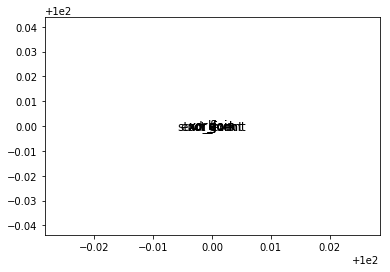

In [103]:
#('c', ('f', 'g', 'f'), 'h')
#layouter.generate_layout(bpmn_graph)
#bpmn_python.bpmn_diagram_layouter.insert_into_grid(grid, 8, col, node_id)
bpmn_graph.export_xml_file(output_directory, output_file_with_di)
visualizer.bpmn_diagram_to_png(bpmn_graph, output_directory + output_png_file)
visualizer.visualize_diagram(bpmn_graph)